In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv("heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#here cp=chest pain ,trestbps=resting bp ,chol= serum cholestrol, fbs=fasting blod sugar, thalach=max heart rate achieved, exang= exercise induced angina

In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
group=heart.groupby("target")

patient=group.get_group(1)
patient["sex"].value_counts()

sex
1    93
0    72
Name: count, dtype: int64

Text(0.5, 1.0, 'gender of patients')

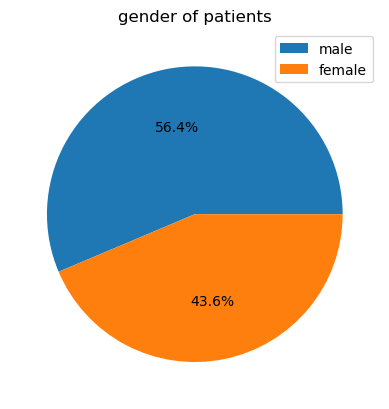

In [9]:
plt.pie(x=patient["sex"].value_counts(),autopct="%1.1f%%")
plt.legend(["male","female"])
plt.title("gender of patients")

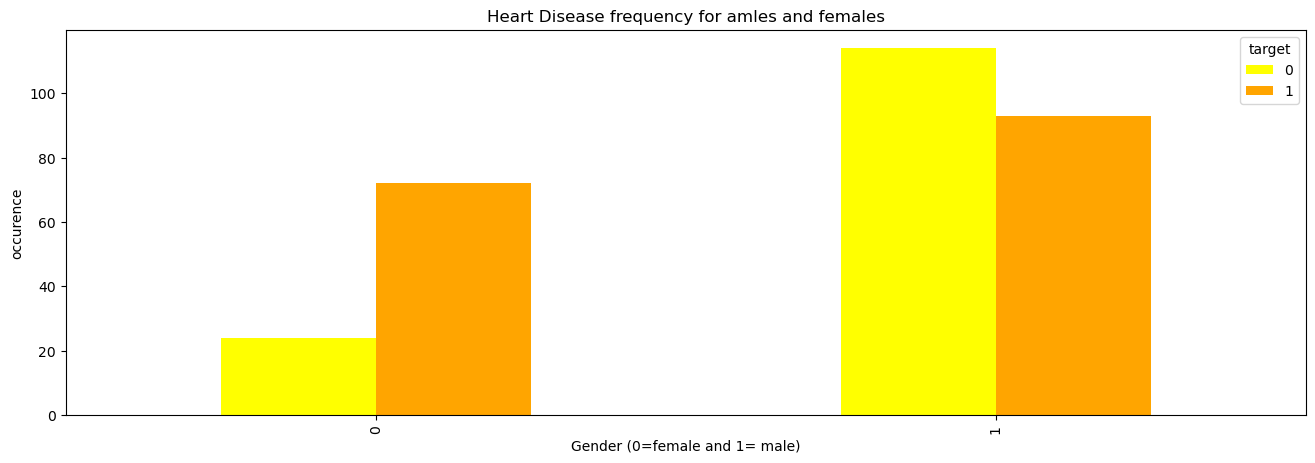

In [10]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(16,5),color=["yellow","orange"])

plt.title('Heart Disease frequency for amles and females')
plt.xlabel('Gender (0=female and 1= male)')
plt.ylabel('occurence')
plt.show()

Text(0.5, 1.0, 'heart disease frequency with age')

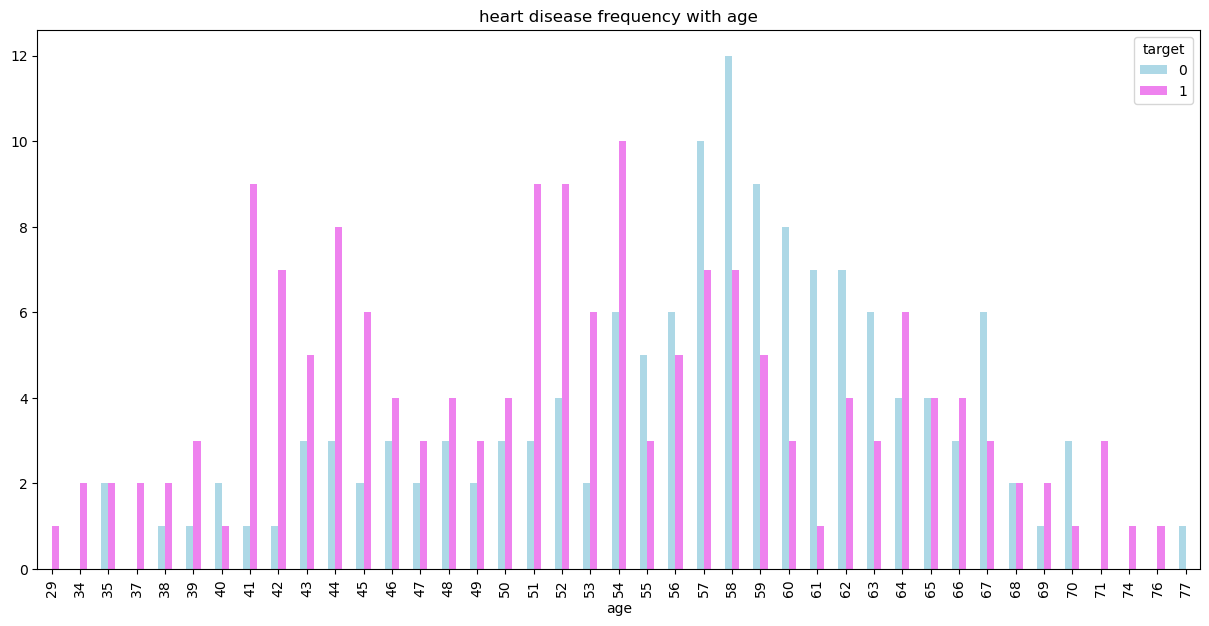

In [11]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",color=["lightblue","violet"],figsize=(15,7))
plt.title("heart disease frequency with age")

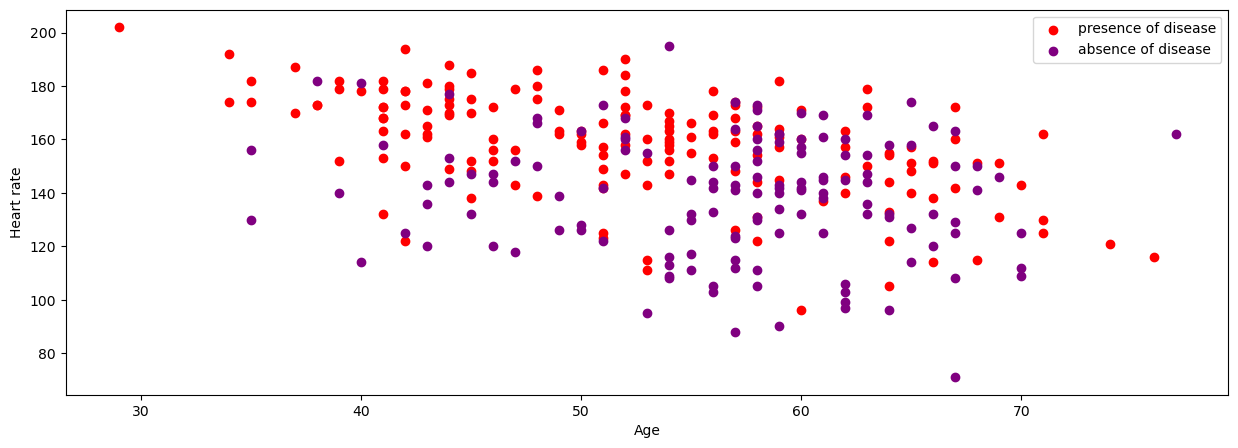

In [12]:
fig=plt.figure(figsize=(15,5))
plt.scatter(x=heart.age[heart.target==1],y=heart.thalach[heart.target==1],color="red")
plt.scatter(x=heart.age[heart.target==0],y=heart.thalach[heart.target==0],color="purple")

plt.legend(["presence of disease","absence of disease"])
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.show()

In [13]:
heart.slope.value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

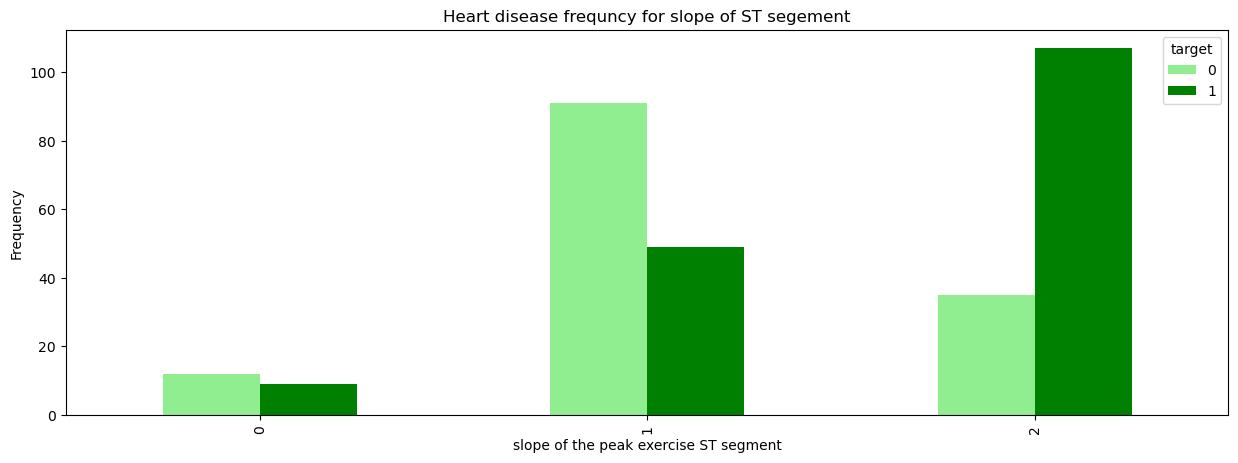

In [14]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",color=["lightgreen","green"],figsize=(15,5))

plt.title("Heart disease frequncy for slope of ST segement")
plt.xlabel("slope of the peak exercise ST segment")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'fasting blood sugar level')

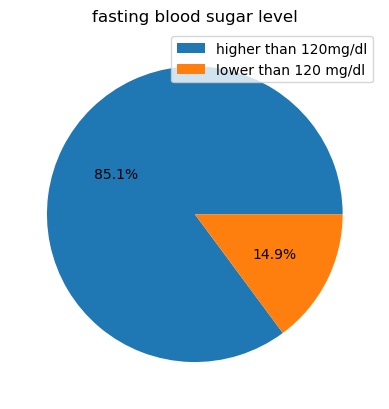

In [15]:

plt.pie(heart.fbs.value_counts(),autopct="%1.1f%%")
plt.legend(["higher than 120mg/dl","lower than 120 mg/dl"],loc="upper right")
plt.title("fasting blood sugar level")

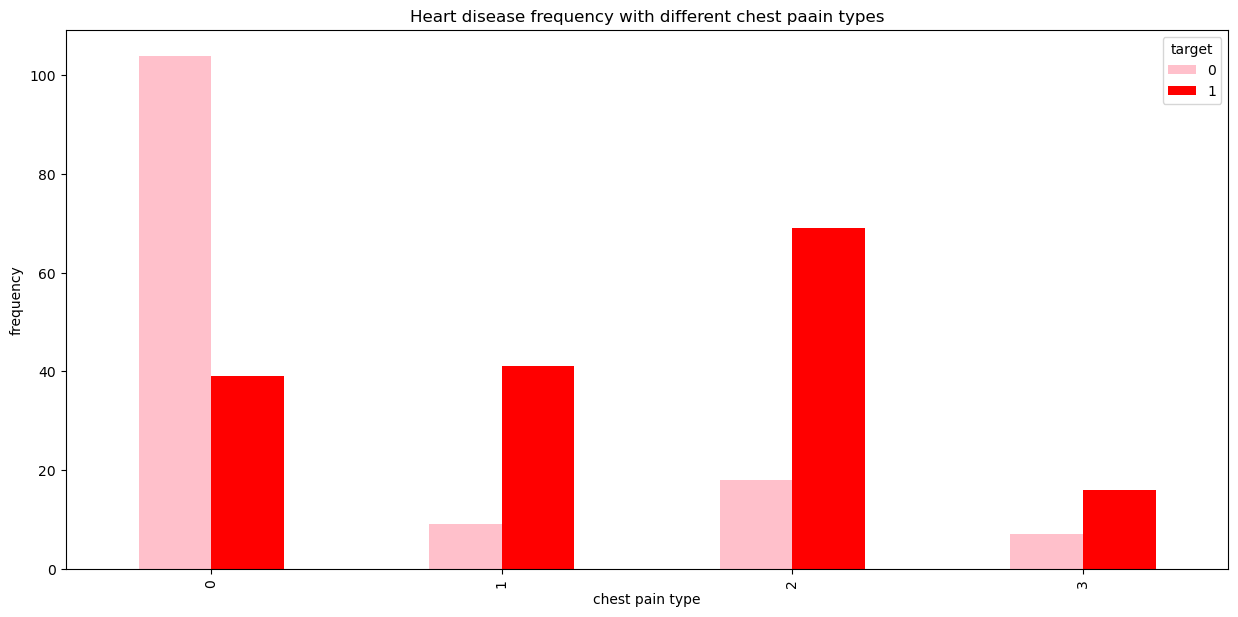

In [16]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",color=["pink","red"],figsize=(15,7))

plt.title("Heart disease frequency with different chest paain types")
plt.xlabel("chest pain type")
plt.ylabel("frequency")
plt.show()

In [17]:
#model training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
y=heart["target"]
x=heart.drop("target",axis=1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
x_train.shape

(242, 13)

In [21]:
x_test.shape

(61, 13)

In [22]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
lr_pred=lr.predict(x_test)

In [23]:
from sklearn import metrics
print(f"test_acc1={metrics.accuracy_score(lr_pred,y_test)}")
print(f"train_acc1={metrics.accuracy_score(train_pred,y_train)}")

test_acc1=0.8360655737704918
train_acc1=0.8677685950413223


In [24]:
conf=metrics.confusion_matrix(y_test,lr_pred)

<Axes: >

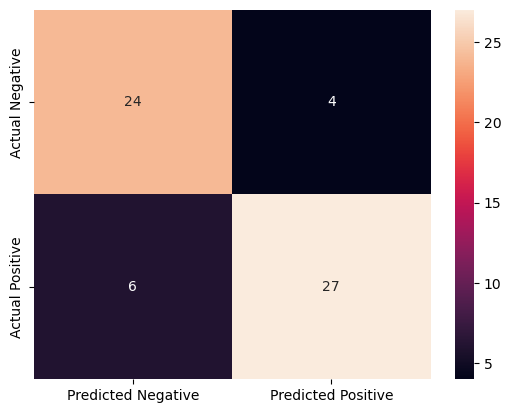

In [25]:
sns.heatmap(conf,annot=True,xticklabels=['Predicted Negative', 'Predicted Positive'],yticklabels=['Actual Negative', 'Actual Positive'])